In [2]:
import torch
import numpy as np
from collections import defaultdict
from scipy.stats import spearmanr, pearsonr
from scipy.stats.stats import kendalltau as kendallr

In [21]:
results = torch.load('results/results_lsvq,0,7186_s32*32_ens24.pkl')

In [68]:
spearmanr(np.concatenate((rescale(x2_pr_labels, gt_labels),rescale(l_pr_labels, l_gt_labels)),0), gt_labels + l_gt_labels)

SpearmanrResult(correlation=0.8557201731983886, pvalue=0.0)

In [42]:
x1_results = results[7186:10759]
l_results = results[:7186]
x2_results = torch.load('results/2x_results_lsvq,7186,10759_s32*32_ens1.pkl')
x3_results = torch.load('results/3x_results_lsvq,7186,10759_s32*32_ens1.pkl')
x4_results = torch.load('results/4x_results_lsvq,7186,10759_s32*32_ens1.pkl')

In [43]:
l_pr_labels = [np.mean(r['pr_labels'][:4]) for r in l_results]
x1_pr_labels = [np.mean(r['pr_labels'][:4]) for r in x1_results]
x2_pr_labels = [np.mean(r['pr_labels']) for r in x2_results]
x3_pr_labels = [np.mean(r['pr_labels']) for r in x3_results]
x4_pr_labels = [np.mean(r['pr_labels']) for r in x4_results]

In [4]:
len(results)

3573

In [10]:
def rescale(pr, gt=None):
    if gt is None:
        pr = ((pr - np.mean(pr)) / np.std(pr))
    else:
        pr = ((pr - np.mean(pr)) / np.std(pr)) * np.std(gt) + np.mean(gt)
    return pr

all_datasets = ['LIVE_VQC', 'KoNViD', 'CVD2014', 'LSVQ']

def pyramid_ensemble_coefficients(results):
    ens_result_len = results[0].get('pr_labels').shape[0]
    print(ens_result_len)
    
    gt_labels = [r['gt_label'] for r in results]
    
    p_results = defaultdict()
    
    for i in range(1, ens_result_len + 1):
        scores = np.zeros(4)
        for j in range(ens_result_len - i + 1):
            pr_labels = [np.mean(r['pr_labels'][j:(j+i)]) for r in results]
            pr_labels = rescale(pr_labels, gt_labels)
            scores += np.array([spearmanr(gt_labels, pr_labels)[0], pearsonr(gt_labels, pr_labels)[0], kendallr(gt_labels, pr_labels)[0], np.sqrt(((gt_labels - pr_labels) ** 2).mean())])
        scores /= ens_result_len - i + 1
        p_results[i] = scores
        
    return p_results

def pyramid_ensemble_stds(results):
    ens_result_len = results[0].get('pr_labels').shape[0]
    
    gt_labels = [r['gt_label'] for r in results]
    
    s_results = defaultdict()
    
    for i in range(1, ens_result_len + 1):
        all_pr_labels = []
        stds = np.zeros(2)
    
        for j in range(ens_result_len - i + 1):
            pr_labels = [np.mean(r['pr_labels'][j:(j+i)]) for r in results]
            pr_labels = rescale(pr_labels, gt_labels)
            all_pr_labels.append(pr_labels)

        all_pr_labels = np.stack(all_pr_labels, 1)
        for q in range(2):
            stds[q] = np.mean(np.std(all_pr_labels, q))
        s_results[i] = stds
    return s_results

In [22]:
pyramid_ensemble_coefficients(results)

24


defaultdict(None,
            {1: array([0.87504507, 0.87629678, 0.69196079, 5.22992075]),
             2: array([0.87647025, 0.87764848, 0.69377774, 5.20127453]),
             3: array([0.87694132, 0.87809685, 0.69437076, 5.1917374 ]),
             4: array([0.87717224, 0.87831941, 0.69465929, 5.18699664]),
             5: array([0.8773062 , 0.878445  , 0.69482319, 5.18431966]),
             6: array([0.87738143, 0.87851512, 0.69490909, 5.18282442]),
             7: array([0.87743896, 0.8785657 , 0.69497576, 5.18174574]),
             8: array([0.87748355, 0.87860849, 0.69503407, 5.18083275]),
             9: array([0.87751931, 0.87864138, 0.69508121, 5.18013091]),
             10: array([0.8775424 , 0.8786674 , 0.69511165, 5.17957579]),
             11: array([0.87756184, 0.87868739, 0.69513434, 5.17914914]),
             12: array([0.87758488, 0.87871029, 0.69516058, 5.17866046]),
             13: array([0.87760628, 0.87872741, 0.69518653, 5.17829513]),
             14: array([0.877

In [26]:
array = np.array
g1080p = {1: array([0.77673416, 0.81133356, 0.58543913, 6.38314188]),
             2: array([0.778817  , 0.81321996, 0.58747162, 6.351161  ]),
             3: array([0.77951009, 0.81384125, 0.58815579, 6.34059146]),
             4: array([0.77984846, 0.81413645, 0.58848506, 6.3355633 ]),
             5: array([0.78006772, 0.81431044, 0.58870544, 6.33259779]),
             6: array([0.78021264, 0.81442776, 0.58885535, 6.33059726]),
             7: array([0.78031236, 0.81450768, 0.58894736, 6.32923414]),
             8: array([0.78038168, 0.8145556 , 0.58901685, 6.32841716]),
             9: array([0.78041286, 0.81458819, 0.58904948, 6.32786152]),
             10: array([0.78045385, 0.81462092, 0.58907799, 6.32730341]),
             11: array([0.78050305, 0.81465109, 0.58912173, 6.32678878]),
             12: array([0.78053333, 0.81467357, 0.58914021, 6.32640555]),
             13: array([0.78057324, 0.81469934, 0.58917535, 6.32596611]),
             14: array([0.78060338, 0.81472858, 0.58920843, 6.32546709]),
             15: array([0.78062197, 0.81475225, 0.58923309, 6.32506327]),
             16: array([0.78064719, 0.81477802, 0.58926488, 6.32462352]),
             17: array([0.78067911, 0.81481325, 0.58929766, 6.32402206]),
             18: array([0.78070541, 0.81484712, 0.58932331, 6.32344374]),
             19: array([0.78072944, 0.81487079, 0.58935705, 6.32303956]),
             20: array([0.78074689, 0.81489148, 0.58938229, 6.32268645]),
             21: array([0.78077828, 0.81492023, 0.58941221, 6.32219551]),
             22: array([0.78079909, 0.81495493, 0.58943656, 6.32160266]),
             23: array([0.78084046, 0.81498496, 0.58948059, 6.32108957]),
             24: array([0.78089157, 0.81503147, 0.58955428, 6.32029518])}
gothers = {1: array([0.87504507, 0.87629678, 0.69196079, 5.22992075]),
             2: array([0.87647025, 0.87764848, 0.69377774, 5.20127453]),
             3: array([0.87694132, 0.87809685, 0.69437076, 5.1917374 ]),
             4: array([0.87717224, 0.87831941, 0.69465929, 5.18699664]),
             5: array([0.8773062 , 0.878445  , 0.69482319, 5.18431966]),
             6: array([0.87738143, 0.87851512, 0.69490909, 5.18282442]),
             7: array([0.87743896, 0.8785657 , 0.69497576, 5.18174574]),
             8: array([0.87748355, 0.87860849, 0.69503407, 5.18083275]),
             9: array([0.87751931, 0.87864138, 0.69508121, 5.18013091]),
             10: array([0.8775424 , 0.8786674 , 0.69511165, 5.17957579]),
             11: array([0.87756184, 0.87868739, 0.69513434, 5.17914914]),
             12: array([0.87758488, 0.87871029, 0.69516058, 5.17866046]),
             13: array([0.87760628, 0.87872741, 0.69518653, 5.17829513]),
             14: array([0.87761514, 0.87873838, 0.6952007 , 5.17806099]),
             15: array([0.87762801, 0.87875467, 0.69521681, 5.17771316]),
             16: array([0.87764852, 0.87876925, 0.69524253, 5.17740202]),
             17: array([0.87766757, 0.87878277, 0.69526769, 5.17711328]),
             18: array([0.87767616, 0.87879486, 0.69527365, 5.17685516]),
             19: array([0.8776917 , 0.87881459, 0.69529908, 5.17643375]),
             20: array([0.87771783, 0.87883888, 0.69533677, 5.17591488]),
             21: array([0.87772525, 0.87885071, 0.69534916, 5.1756623 ]),
             22: array([0.87773174, 0.87885395, 0.69536237, 5.17559297]),
             23: array([0.87772291, 0.87885064, 0.69535554, 5.17566388]),
             24: array([0.87770259, 0.87882243, 0.69532555, 5.17626633])}

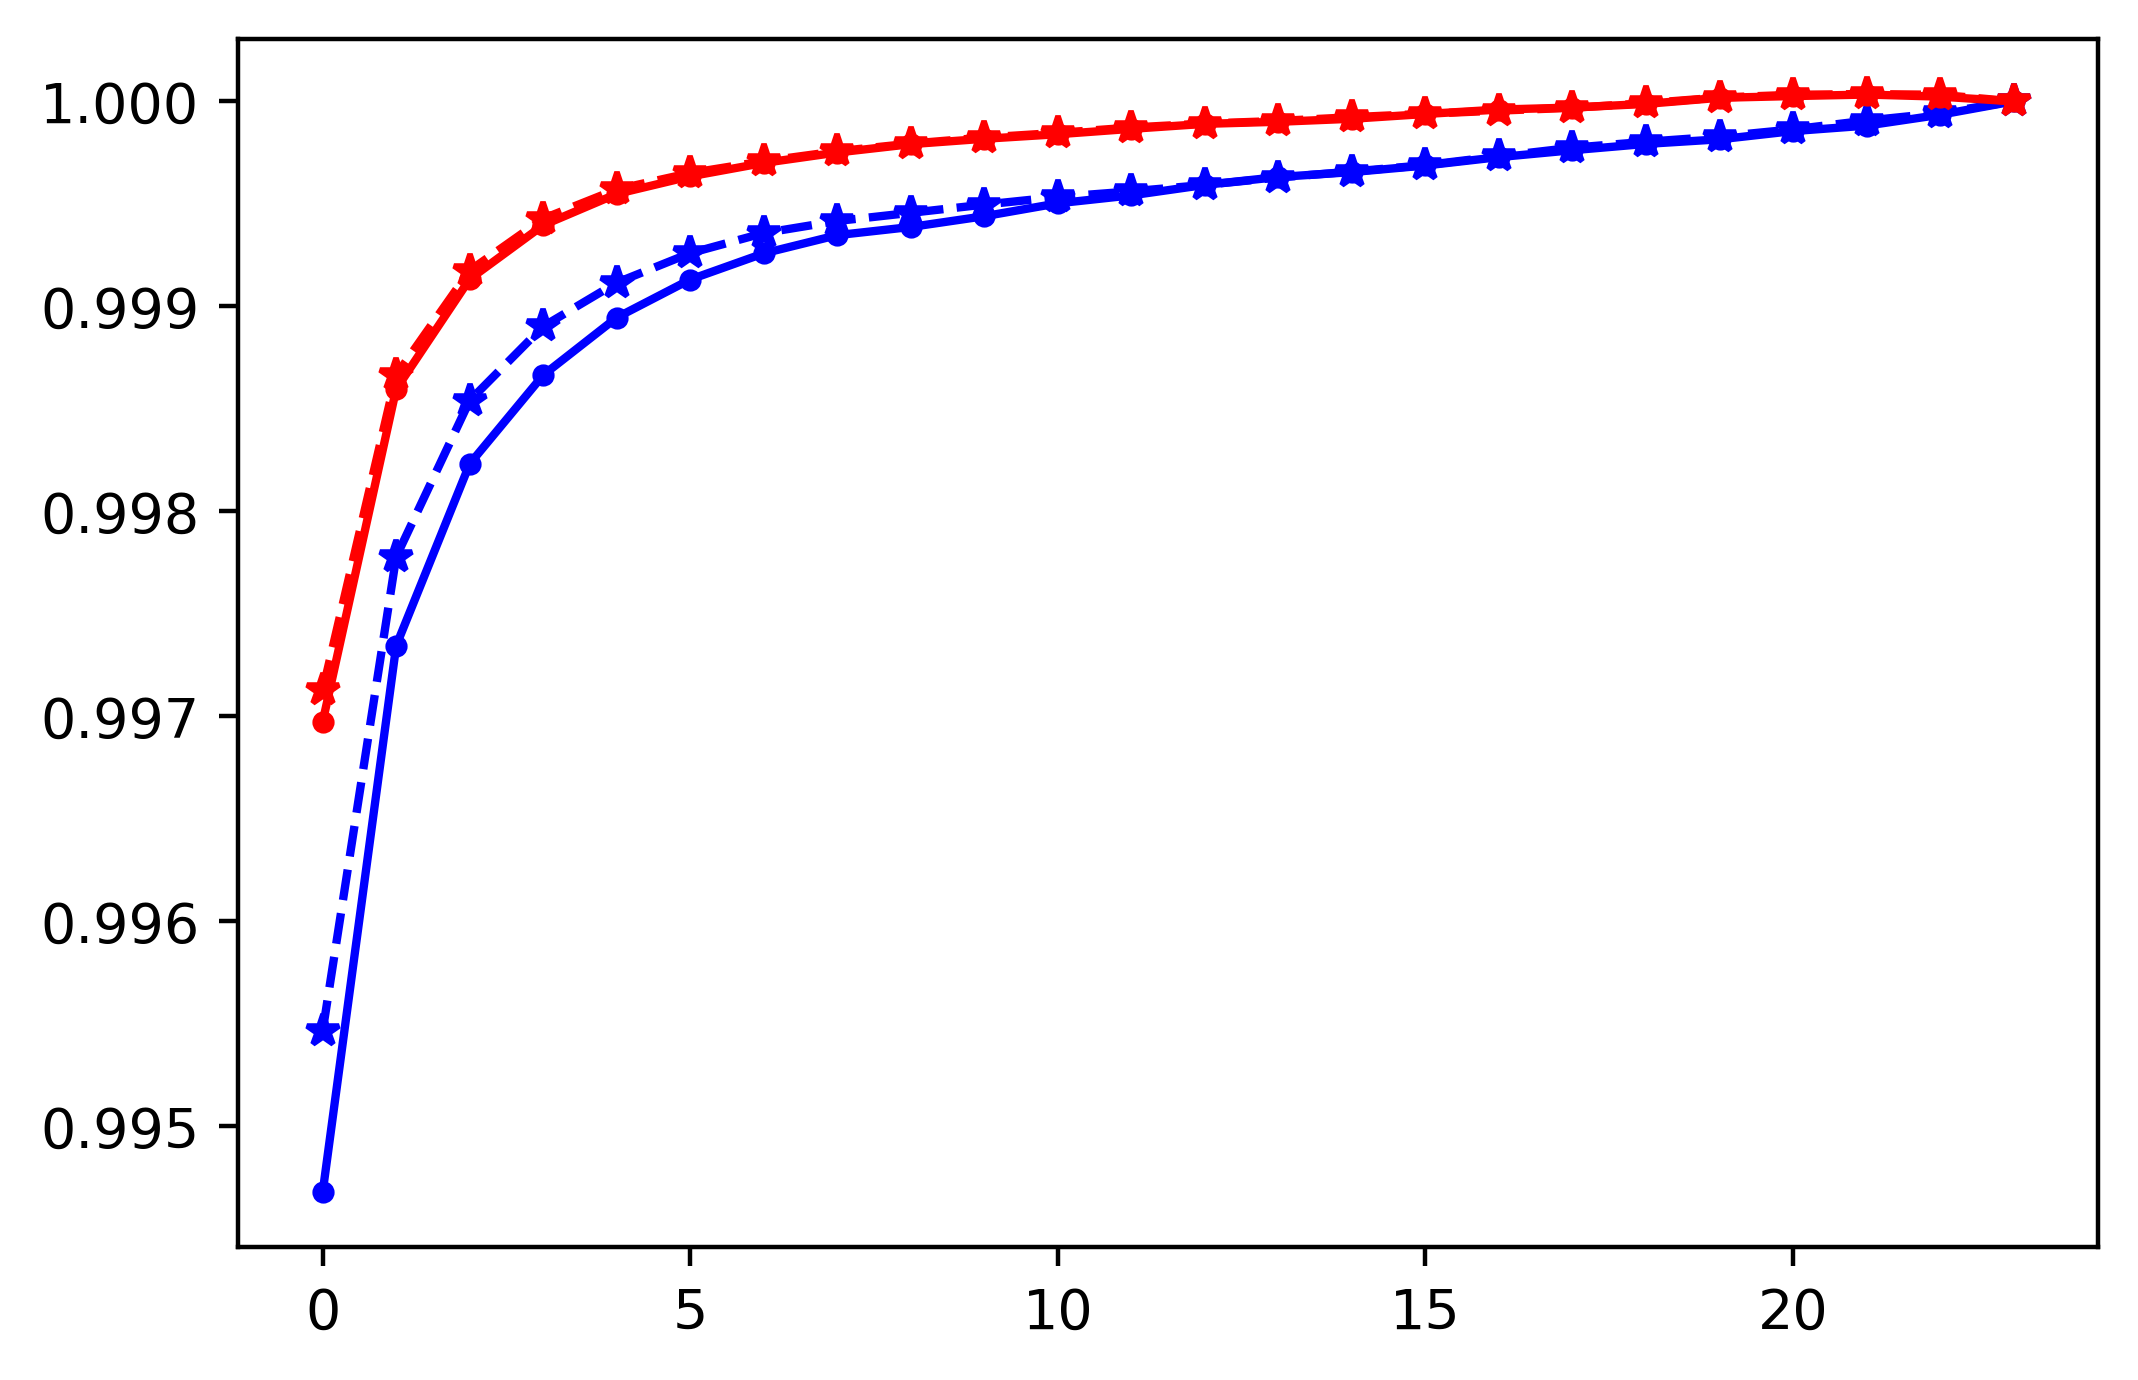

In [43]:
from matplotlib import pyplot as plt
plt.figure(dpi=400)
#plt.plot(range(24), [e[2] / 0.58955428 for e in g1080p.values()], c='b', marker='*')
plt.plot(range(24), [e[0] / 0.78089157 for e in g1080p.values()], c='b', marker='.')
plt.plot(range(24), [e[1] / 0.81503147 for e in g1080p.values()], c='b', marker='*', linestyle='--')


#plt.plot(range(24), [e[2] / 0.69532555 for e in gothers.values()], c='r')
plt.plot(range(24), [e[0] / 0.87770259 for e in gothers.values()], c='r', marker='.')
plt.plot(range(24), [e[1] / 0.87882243 for e in gothers.values()], c='r', marker='*', linestyle='--')

plt.savefig('demos/impact_on_subsample.png')

In [12]:
pyramid_ensemble_stds(results)

defaultdict(None,
            {1: array([10.39138508,  0.89352334]),
             2: array([10.39138412,  0.6148625 ]),
             3: array([10.39138603,  0.48615307]),
             4: array([10.39138508,  0.40591806]),
             5: array([10.39138508,  0.3487941 ]),
             6: array([10.39138603,  0.30510741]),
             7: array([10.39138412,  0.26915753]),
             8: array([10.39138699,  0.23868853]),
             9: array([10.39138412,  0.21215834]),
             10: array([10.39138699,  0.18872735]),
             11: array([10.39138508,  0.16763899]),
             12: array([10.39138412,  0.14861126]),
             13: array([10.39138603,  0.13139443]),
             14: array([10.39138412,  0.11630556]),
             15: array([10.39138508,  0.10349436]),
             16: array([10.39138412,  0.09192926]),
             17: array([10.39138603,  0.08143502]),
             18: array([10.39138699,  0.07139887]),
             19: array([10.39138317,  0.06173347]),
   